## Enter Libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris()
X, y = iris_data.data, iris_data.target
# X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
# y = iris_data.target

In [3]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
X.shape

(150, 4)

## Split Data To Train and Test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [6]:
len(y_train)

120

## Scale Data

In [7]:
scale = StandardScaler()
X_trainscaled = scale.fit_transform(X_train)
X_testscaled = scale.fit_transform(X_test)

## Set Model For Predict

In [14]:
MLP = MLPClassifier(hidden_layer_sizes=(256 ,128, 64, 32), activation="relu", learning_rate='adaptive', solver='sgd',
    learning_rate_init=0.001, verbose=1, random_state=42, max_iter=300)

## Train Model

In [15]:
MLP.fit(X_trainscaled, y_train)

Iteration 1, loss = 1.14464232
Iteration 2, loss = 1.14376375
Iteration 3, loss = 1.14251007
Iteration 4, loss = 1.14093460
Iteration 5, loss = 1.13908054
Iteration 6, loss = 1.13698349
Iteration 7, loss = 1.13468020
Iteration 8, loss = 1.13219947
Iteration 9, loss = 1.12956230
Iteration 10, loss = 1.12678907
Iteration 11, loss = 1.12389160
Iteration 12, loss = 1.12088892
Iteration 13, loss = 1.11780165
Iteration 14, loss = 1.11465729
Iteration 15, loss = 1.11147652
Iteration 16, loss = 1.10826428
Iteration 17, loss = 1.10500295
Iteration 18, loss = 1.10171690
Iteration 19, loss = 1.09841535
Iteration 20, loss = 1.09511071
Iteration 21, loss = 1.09179642
Iteration 22, loss = 1.08847960
Iteration 23, loss = 1.08516737
Iteration 24, loss = 1.08187246
Iteration 25, loss = 1.07857800
Iteration 26, loss = 1.07528322
Iteration 27, loss = 1.07199022
Iteration 28, loss = 1.06869468
Iteration 29, loss = 1.06539708
Iteration 30, loss = 1.06211004
Iteration 31, loss = 1.05884050
Iteration 32, los

C:\Users\Radin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive',
              max_iter=300, random_state=42, solver='sgd', verbose=1)

## Predict Model

In [18]:
y_pred = MLP.predict(X_testscaled)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
MLP.score(X_testscaled, y_test)

1.0

## Model Validation

accuracy score

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

matrix confusion

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

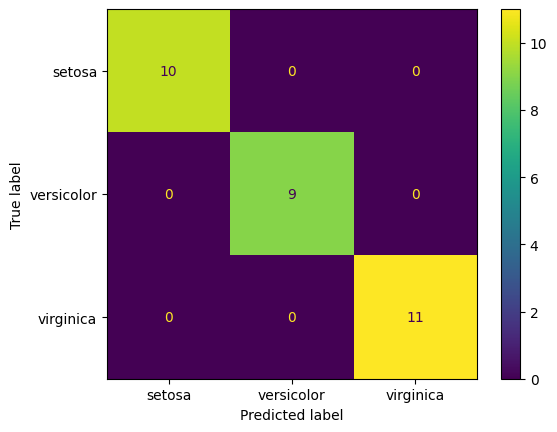

In [23]:
fig = ConfusionMatrixDisplay.from_estimator(MLP, X_testscaled, y_test, display_labels=["setosa", 'versicolor', 'virginica'])
plt.show()